## Clustering Workshop: Online Retail Dataset

Dataset:
https://archive.ics.uci.edu/ml/datasets/online+retail

Objective:
Explore the dataset by finding clusters

### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Attribute Information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
# You can use read_excel, but it requires additional dependencies, and
# isn't as easy to use as pd.read_csv

df = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/Online Retail.csv', parse_dates=True, encoding='latin-1')
df.head()
df.shape

(541909, 8)

In [60]:
df.isnull().values.any()

True

In [61]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,1/12/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,1/12/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,1/12/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,1/12/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1/12/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,1/12/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,1/12/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,1/12/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,1/12/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,1/12/2010 14:32,0.43,NaN,United Kingdom


In [62]:
df.dropna(inplace=True)

In [63]:
# See what types we need to convert
df.dtypes
df.shape

(406829, 8)

## Data Transformation (Estimated time: 60 minutes)


### Which of these should we convert to numbers?
```
InvoiceNo              object -> Label Encode
StockCode              object -> Label Encode
Description            object -> Tfidf
Quantity                int64
InvoiceDate            object -> pd.to_datetime
UnitPrice             float64
CustomerID            float64
Country                object -> Label Encode
```

### 1. Label Encode string columns (except Description)

Q: is it better to keep separate encoders or to use separate columns?

A: separate encoders are cheaper for large datasets because you would only need to store the label mapping in memory

In [64]:
#encoder_invoice_no = LabelEncoder()
#df['InvoiceNo'] = encoder_invoice_no.fit_transform(df['InvoiceNo'])

#encoder_stock_code = LabelEncoder()
#df['StockCode'] = encoder_stock_code.fit_transform(df['StockCode'])

enc_col = LabelEncoder()
df['Country']=enc_col.fit_transform(df['Country'])

df.head()
df.shape


(406829, 8)

In [65]:
#Not working --> Still to be explored.
#enc_col1=LabelEncoder()
#fitarray = enc_col.fit(df['Country'])
#enc_col.inverse_transform(df['Country'])
#fitarray.transform(df['Country'])

### 2. Convert InvoiceDate column from string to datetime

Try something like:
```
pd.to_datetime(..., format='%d/%m/%Y %H:%M')
```

In [66]:
TfidfVectorizer?

### 3. Convert Description to Tf-Idf features

Description is fairly simple text, so we can try scikit learn's tokenizer. 

No need to use spacy to tokenize.

```
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             max_df=3, min_df=1)
```

- max_df allows us to skip words that are too frequent
- min_df allows us to skip words are are too unique

In [67]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             max_df=200, min_df=1)

In [68]:
X = vectorizer.fit_transform(df['Description'])



In [69]:
print(vectorizer.get_feature_names())

X.shape




['120cm', '15', '16x16cm', '17080', '18pc', '200', '20light', '21', '23', '25w', '25x24x12cm', '30', '30cm', '30cmx30cm', '34x20cm', '35', '40', '40cm', '40x40cm', '42', '45cm', '45x30cm', '45x45cm', '500g', '50cm', '5g', '60cm', '60x40cm', '65cmx65cm', '6pc', '70', '75', '8m', 'a4', 'a5', 'a6', 'abc', 'abstract', 'account', 'address', 'ade', 'adult', 'afghan', 'ahoy', 'air', 'airmail', 'allium', 'alpine', 'aluminium', 'amber', 'amethyst', 'anemone', 'antoienett', 'antoinette', 'aperitif', 'aqua', 'army', 'articulated', 'artificial', 'artiifcial', 'ashtray', 'asst', 'azure', 'bad', 'bain', 'bake', 'baker', 'balls', 'balm', 'bamboo', 'band', 'bangle', 'banner', 'banquet', 'bar', 'barn', 'baroquecandlestick', 'barrel', 'barrier', 'base', 'baseball', 'basin', 'baskets', 'battery', 'bazaar', 'bea', 'beakers', 'bear', 'beaten', 'beautiful', 'beauty', 'bed', 'bedside', 'bee', 'beetles', 'belle', 'bendy', 'berries', 'bertie', 'beurre', 'bib', 'bili', 'birdie', 'birds', 'bitty', 'blackblue', '

(406829, 1129)

### Combine all converted columns into our dataframe

Something like this:

```
# Recall that TFIDF has each term as a feature

df_tfidf = pd.DataFrame(list(description_tfidf.toarray()),  
                        columns=vectorizer.get_feature_names(),
                        index=df.index)
                        
# Combine into 1 dataframe

df_combined = pd.concat([df, df_tfidf], axis=1)
```

In [70]:
df_tfidf = pd.DataFrame(X.toarray(),  
                        columns=vectorizer.get_feature_names(),
                        index=df.index)


In [71]:
print(df.shape)
print(df_tfidf.shape)

df_tfidf.head()

df_combined = pd.concat([df, df_tfidf], axis=1)


df_combined[df_combined.isnull().any(axis=1)]

df_combined.shape
#df.dropna(inplace=True)

(406829, 8)
(406829, 1129)


(406829, 1137)

## Cluster! (Estimated time: 90 minutes)

### 1. Pick our numeric columns

```
columns = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']

columns = columns + vectorizer.get_feature_names()
```

... Then apply .loc to select them

In [72]:
columns = ['Quantity','UnitPrice','CustomerID','Country']
columns = columns+vectorizer.get_feature_names()

### 2. Pick a subset of datapoints to try clustering

(let's say 300 datapoints)

(You can always add more datapoints after you have the initial clustering model)

In [73]:
nsamples=300
df_sliced=df_combined.iloc[:nsamples]
df_combined
df_combined[df_combined.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,120cm,15,...,wishes,witch,wobbly,women,work,woven,wrapping,wrecking,xmas,yuletide


In [74]:
X = df_combined.loc[:300, columns]
X.shape

X

X[X.isnull().any(axis=1)]

X=X[:500]

### 3. Plot the data points

In [75]:
# Apply PCA to convert to 2-dimensions

In [76]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)


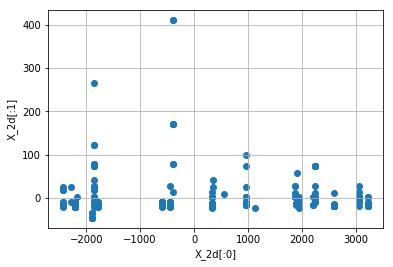

In [77]:
# Plot the scatter plot
fig,ax = plt.subplots()
ax.scatter(X_2d[:,0],X_2d[:,1])
ax.grid()
ax.set(xlabel='X_2d[:0]',ylabel='X_2d[:1]')
plt.show()

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

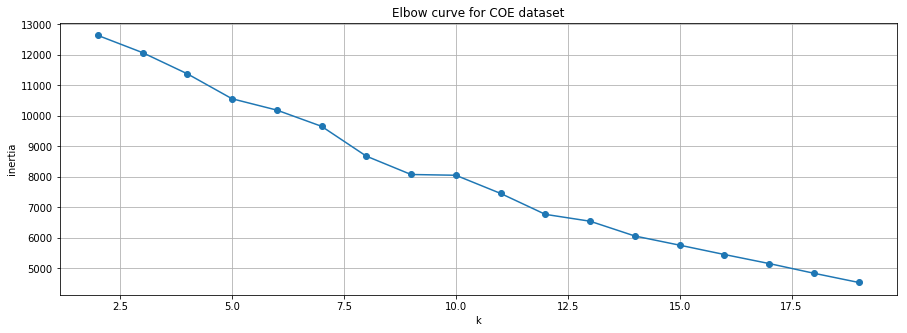

In [79]:
ks = range(2, 20)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    #print(kmeans)
    
    # inertia: sum of squared distances of samples
    # to their closest cluster center.
    inertias.append(kmeans.inertia_)
    #print(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ks, inertias, marker='o')
ax.grid()
ax.set(title='Elbow curve for COE dataset',
       xlabel='k', ylabel='inertia')
plt.show()

### 4. Apply KMeans clustering

In [80]:
# Plot the Elbow diagram to pick the number of clusters

In [81]:
import numpy as np

def plot_decision_boundaries(ax, title, kmeans_model, data):
    """Plots the decision boundaries for a fitted k-means model
    Args:
        ax: subplot axis
        title: subplot title
        kmeans_model: a fitted sklearn.cluster.KMeans model
        data: 2-dimensional input data to cluster and plot
 
    Based on: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .5     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the trained model.
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Pastel2,
              aspect='auto', origin='lower')

    ax.plot(data[:, 0], data[:, 1], 'k.', markersize=4)

    # Plot the centroids as a red X
    centroids = kmeans.cluster_centers_

    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=169, linewidths=3,
               color='red', zorder=10, label='centroids')
    ax.set(title=title,
           xlim=(x_min, x_max), ylim=(y_min, y_max),
           xticks=(), yticks=())
    ax.legend()

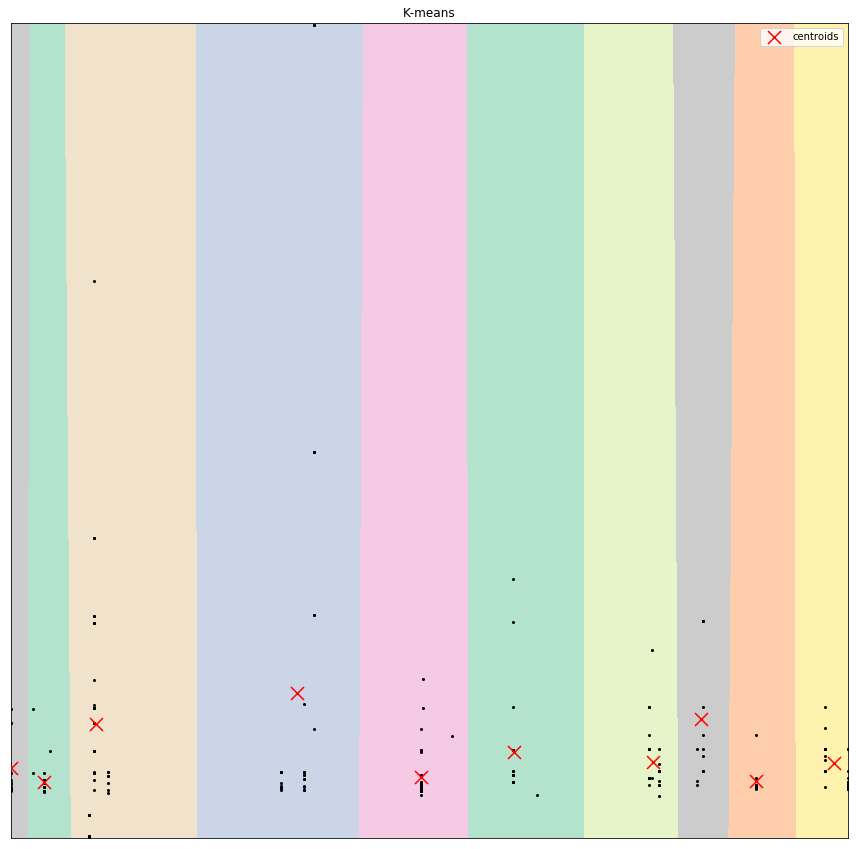

In [82]:
from sklearn.cluster import KMeans

n_classes = 10
fig, ax = plt.subplots(figsize=(15, 15))

kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(X_2d)
plot_decision_boundaries(ax, 'K-means', kmeans, X_2d)

### 5. Re-plot the PCA plot with cluster centroids for the best k

1. Pick the best k

2. Do something like this to PCA transform the cluster centers:
```
centroids_2d = pca.transform(kmeans.cluster_centers_)
```

3. Re-plot the PCA scatter plot with the cluster centers overlaid.


4. You can also colour the scatter plots using the cluster ids

In [83]:
k=6
print(X.shape)
#Run KMeans on a dataset
kmeans=KMeans(n_clusters=k)
kmeans.fit(X)#117 dimensions

kmeans.cluster_centers_
print(kmeans.cluster_centers_.shape)



(301, 1133)
(6, 1133)


In [84]:
centroids_2d= pca.transform(kmeans.cluster_centers_)
print(centroids_2d.shape)

(6, 2)


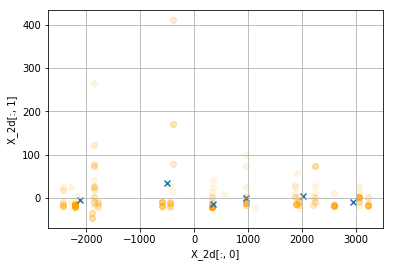

In [85]:
# plot PCA again with X for kmeans.cluster_centers_
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], alpha=.1, color='orange')

ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x')

ax.grid()
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]')
plt.show()

### 6. Cluster Metrics

Since we don't have the labels, we have to use silhouette_score

```
from sklearn.metrics import silhouette_score

# S=(b-a)/max(a, b)
# a: average distance between each sample and samples from the same cluster
# b: average distance between each sample and nearest cluster samples

print(silhouette_score(X, clusters, sample_size=300, random_state=42))
```

In [86]:
#predicting clusters for the input values.

from sklearn.metrics import silhouette_score
clusters = kmeans.predict(X)
print(clusters)
print(silhouette_score(X, clusters, sample_size=300, random_state=42))

X['clusters']=clusters


[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 4 4 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 2 2 2 2 2 2
 2 2 2 2 2 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 5 5]
0.8282175709653474


In [87]:
X.head()

,Quantity,UnitPrice,CustomerID,Country,120cm,15,16x16cm,17080,18pc,200,...,witch,wobbly,women,work,woven,wrapping,wrecking,xmas,yuletide,clusters
0,6,2.55,17850.0,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,6,3.39,17850.0,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,8,2.75,17850.0,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,6,3.39,17850.0,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6,3.39,17850.0,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [88]:


X.dtypes

Quantity         int64
UnitPrice      float64
CustomerID     float64
Country          int64
120cm          float64
15             float64
16x16cm        float64
17080          float64
18pc           float64
200            float64
20light        float64
21             float64
23             float64
25w            float64
25x24x12cm     float64
30             float64
30cm           float64
30cmx30cm      float64
34x20cm        float64
35             float64
40             float64
40cm           float64
40x40cm        float64
42             float64
45cm           float64
45x30cm        float64
45x45cm        float64
500g           float64
50cm           float64
5g             float64
                ...   
voile          float64
votive         float64
wake           float64
wallhanging    float64
washbag        float64
waste          float64
wastepaper     float64
wedding        float64
weekend        float64
weight         float64
wheelbarrow    float64
whisk          float64
whit       

### Exploring data with clusters

Now that we have the clusters, we can use pandas to divide the dataset into the clusters.

In [89]:
X_all = df_combined.loc[:, columns]
print('All dataset', X_all.shape)

clusters = kmeans.predict(X_all)
print(clusters)
print(df.shape)
df['cluster'] = clusters
df.head()

All dataset (406829, 1133)
[1 1 1 ... 0 0 0]
(406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,35,1
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,35,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,35,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,35,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,35,1


In [90]:
#Unencode the label encoders used

df['Country']=enc_col.inverse_transform(df['Country'])

C:\Users\thang\Anaconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [91]:

df['cluster'] = clusters
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1


In [92]:
df[df.cluster==1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1


In [239]:
df[df.cluster==2].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,1/12/2010 9:09,10.95,15100.0,United Kingdom,2
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,1/12/2010 9:32,3.45,15291.0,United Kingdom,2
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,1/12/2010 9:32,2.55,15291.0,United Kingdom,2
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,1/12/2010 9:41,4.25,15311.0,United Kingdom,2
107,536381,84854,GIRLY PINK TOOL SET,5,1/12/2010 9:41,4.95,15311.0,United Kingdom,2


In [240]:
df[df.cluster==3].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom,3
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,1/12/2010 8:34,2.10,13047.0,United Kingdom,3
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,1/12/2010 8:34,2.10,13047.0,United Kingdom,3
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,1/12/2010 8:34,3.75,13047.0,United Kingdom,3
13,536367,22310,IVORY KNITTED MUG COSY,6,1/12/2010 8:34,1.65,13047.0,United Kingdom,3


In [241]:
df[df.cluster==1].describe()

,Quantity,UnitPrice,CustomerID,cluster
count,60627.000000,60627.000000,60627.000000,60627.0
mean,13.460785,3.477208,13698.648374,1.0
std,307.918452,19.971260,307.224036,0.0
min,-432.000000,0.000000,12346.000000,1.0
25%,2.000000,1.250000,13435.000000,1.0
50%,6.000000,1.950000,13709.000000,1.0
75%,12.000000,3.750000,14005.000000,1.0
max,74215.000000,1599.260000,14156.000000,1.0


In [242]:
df[df.cluster==2].describe()

,Quantity,UnitPrice,CustomerID,cluster
count,50175.000000,50175.000000,50175.000000,50175.0
mean,7.908999,4.015557,15342.622641,2.0
std,365.332997,175.763412,224.445074,0.0
min,-80995.000000,0.000000,14995.000000,2.0
25%,2.000000,1.250000,15129.000000,2.0
50%,4.000000,1.950000,15351.000000,2.0
75%,12.000000,3.750000,15532.000000,2.0
max,1824.000000,38970.000000,16446.000000,2.0


In [243]:
df[df.cluster==3].describe()

,Quantity,UnitPrice,CustomerID,cluster
count,59761.000000,59761.000000,59761.000000,59761.0
mean,13.330684,4.256939,12748.659243,3.0
std,307.497028,48.308960,237.010504,0.0
min,-74215.000000,0.000000,12346.000000,3.0
25%,3.000000,1.250000,12540.000000,3.0
50%,8.000000,1.850000,12748.000000,3.0
75%,12.000000,3.750000,12957.000000,3.0
max,4800.000000,4161.060000,13162.000000,3.0


In [244]:
df.groupby(clusters).sum()

,Quantity,UnitPrice,CustomerID,cluster
0,1043929,274369.620,1.570718e+09,0
1,816087,210812.692,8.305080e+08,60627
2,396834,201480.581,7.698161e+08,100350
3,796655,254398.920,7.618726e+08,179283
4,863476,219480.340,1.008398e+09,276660
5,989907,247277.811,1.278163e+09,390210


In [2]:
df[df.cluster==3].Description.unique

NameError: name 'df' is not defined